<a href="https://colab.research.google.com/github/ng3339-prog/bootcamp_EDA/blob/main/EDA%20STUDY%20GROUP%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
path = '/content/drive/MyDrive/bootcamp_eda_case'

In [8]:
app_data = pd.read_csv('/content/drive/MyDrive/bootcamp_eda_case/application_data.csv')
prev_data = pd.read_csv('/content/drive/MyDrive/bootcamp_eda_case/previous_application.csv')

columns_desc = pd.read_excel('/content/drive/MyDrive/bootcamp_eda_case/columns_description.xlsx')

In [9]:
def explain(col_name, table=None, n=5):
    df = columns_desc
    if table is not None:
        df = df[df["Table"] == table]
    hits = df[df["Row"].astype(str).str.upper() == str(col_name).upper()]
    return hits[["Table", "Row", "Description"]].head(n)


# Example find out what a TARGET is
explain("TARGET", table="application_data")


,Table,Row,Description
1,application_data,TARGET,Target variable (1 - client with payment diffi...


In [10]:
app_data['TARGET'].value_counts(normalize=True)

,proportion
TARGET,
0,0.919271
1,0.080729


Approximately 8% of customers experienced payment difficulties. Approximately 92% of customers made timely repayments.

In [11]:
app_data.shape
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [12]:
num_cols = app_data.select_dtypes(include=['int64','float64']).columns
cat_cols = app_data.select_dtypes(include=['object']).columns

print("Number of numeric variables:", len(num_cols))
print("Number of categorical variables", len(cat_cols))

Number of numeric variables: 106
Number of categorical variables 16


In [13]:
app_data[['TARGET', 'AMT_INCOME_TOTAL']].groupby('TARGET').median()

,AMT_INCOME_TOTAL
TARGET,
0,148500.0
1,135000.0


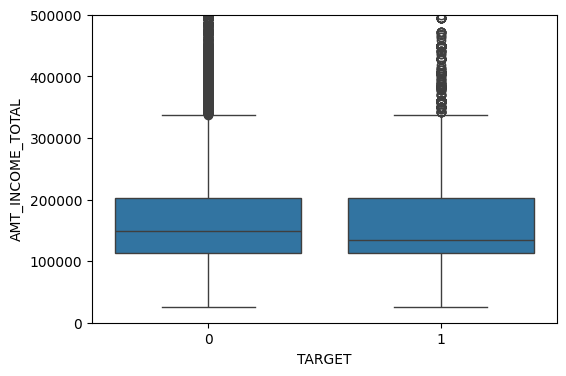

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_data)
plt.ylim(0, 500000)  #limit the upper limit to prevent extreme valuesåå
plt.show()

In [15]:
app_data[['TARGET', 'AMT_CREDIT']].groupby('TARGET').median()

,AMT_CREDIT
TARGET,
0,517788.0
1,497520.0


In [16]:
app_data['CREDIT_INCOME_RATIO'] = app_data['AMT_CREDIT'] / app_data['AMT_INCOME_TOTAL']

app_data[['TARGET', 'CREDIT_INCOME_RATIO']].groupby('TARGET').median()


,CREDIT_INCOME_RATIO
TARGET,
0,3.266653
1,3.253143


"Amount variables" may not be the primary driver.

## Age

In [17]:
app_data[['TARGET', 'DAYS_BIRTH']].groupby('TARGET').median()

,DAYS_BIRTH
TARGET,
0,-15877.0
1,-14282.0


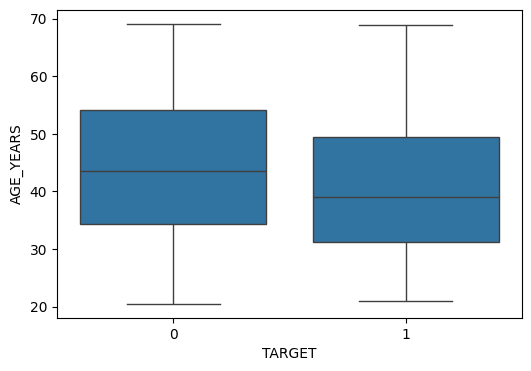

In [18]:
app_data['AGE_YEARS'] = app_data['DAYS_BIRTH'] / -365

plt.figure(figsize=(6,4))
sns.boxplot(x='TARGET', y='AGE_YEARS', data=app_data)
plt.show()


In [19]:
app_data['AGE_GROUP'] = pd.cut(
    app_data['AGE_YEARS'],
    bins=[20,30,40,50,60,70],
    labels=['20-30','30-40','40-50','50-60','60-70']
)

age_default = app_data.groupby('AGE_GROUP')['TARGET'].mean()
age_default


/tmp/ipython-input-3893860444.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_default = app_data.groupby('AGE_GROUP')['TARGET'].mean()


,TARGET
AGE_GROUP,
20-30,0.114569
30-40,0.095835
40-50,0.076508
50-60,0.061297
60-70,0.049214


Younger applicants (especially 20–30 age group) exhibit significantly higher default rates compared to older applicants. Default risk decreases consistently with age, indicating age is a strong predictor of repayment behavior.

## Years of employed

In [20]:
app_data[['TARGET','DAYS_EMPLOYED']].groupby('TARGET').median()

,DAYS_EMPLOYED
TARGET,
0,-1235.0
1,-1034.0


In [21]:
app_data['DAYS_EMPLOYED'].describe()


,DAYS_EMPLOYED
count,307511.000000
mean,63815.045904
std,141275.766519
min,-17912.000000
25%,-2760.000000
50%,-1213.000000
75%,-289.000000
max,365243.000000


In [22]:
(app_data['DAYS_EMPLOYED'] == 365243).sum()

np.int64(55374)

In [23]:
app_data['DAYS_EMPLOYED'] = app_data['DAYS_EMPLOYED'].replace(365243, np.nan)

In [24]:
app_data['DAYS_EMPLOYED'].describe()


,DAYS_EMPLOYED
count,252137.000000
mean,-2384.169325
std,2338.360162
min,-17912.000000
25%,-3175.000000
50%,-1648.000000
75%,-767.000000
max,0.000000


In [25]:
app_data['EMP_YEARS'] = app_data['DAYS_EMPLOYED'] / -365

In [26]:
app_data[['TARGET','EMP_YEARS']].groupby('TARGET').median()


,EMP_YEARS
TARGET,
0,4.632877
1,3.369863


In [27]:
app_data['EMP_GROUP'] = pd.cut(
    app_data['EMP_YEARS'],
    bins=[0,2,5,10,20,40],
    labels=['0-2','2-5','5-10','10-20','20+']
)

emp_default = app_data.groupby('EMP_GROUP')['TARGET'].mean()
emp_default


/tmp/ipython-input-3210212663.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emp_default = app_data.groupby('EMP_GROUP')['TARGET'].mean()


,TARGET
EMP_GROUP,
0-2,0.112010
2-5,0.100779
5-10,0.073714
10-20,0.055133
20+,0.042607


Applicants with shorter employment history exhibit significantly higher default rates. Clients with less than 2 years of employment show a default rate of 11.2%, compared to only 4.26% among those with more than 20 years of employment. This indicates employment stability is a strong predictor of repayment behavior.

Strong signaling variables:

Age (younger age, higher default rate)

Years of employment (shorter employment, higher default rate)

Medium or weak signaling variables:

Income (differences exist but are not significant)

Loan amount (differences are not significant)

DTI (virtually no difference)

## Income type

In [28]:
app_data['NAME_INCOME_TYPE'].value_counts()

,count
NAME_INCOME_TYPE,
Working,158774
Commercial associate,71617
Pensioner,55362
State servant,21703
Unemployed,22
Student,18
Businessman,10
Maternity leave,5


Extreme small sample can be ignored

In [29]:
income_type_default = app_data.groupby('NAME_INCOME_TYPE')['TARGET'].mean().sort_values(ascending=False)
income_type_default

,TARGET
NAME_INCOME_TYPE,
Maternity leave,0.400000
Unemployed,0.363636
Working,0.095885
Commercial associate,0.074843
State servant,0.057550
Pensioner,0.053864
Businessman,0.000000
Student,0.000000


Among major income categories, applicants classified as “Working” exhibit the highest default rate (approximately 9.6%), followed by “Commercial associate” (7.5%), while “State servant” (5.8%) and “Pensioner” (5.4%) show significantly lower default rates. This pattern suggests that income stability plays an important role in repayment behavior, with more stable or institutional income sources associated with lower default risk.

## Education Level

In [30]:
app_data['NAME_EDUCATION_TYPE'].value_counts()

,count
NAME_EDUCATION_TYPE,
Secondary / secondary special,218391
Higher education,74863
Incomplete higher,10277
Lower secondary,3816
Academic degree,164


In [31]:
edu_default = app_data.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values(ascending=False)
edu_default

,TARGET
NAME_EDUCATION_TYPE,
Lower secondary,0.109277
Secondary / secondary special,0.089399
Incomplete higher,0.084850
Higher education,0.053551
Academic degree,0.018293


Education level is strongly associated with default risk. Applicants with lower education levels exhibit significantly higher default rates, while those with higher education demonstrate substantially lower risk. For instance, clients with only lower secondary education show a default rate of approximately 10.9%, compared to 5.4% among those with higher education and just 1.8% for academic degree holders. This suggests that educational attainment is a strong predictor of repayment behavior and may reflect differences in income stability and financial resilience.

So far, identified:

Age (younger, higher risk)

Years of work experience (shorter, higher risk)

Income type (more stable income, lower risk)

Education level (higher education, lower risk)

These are all considered **"stability variables"**.

##Family status

In [32]:
family_default = app_data.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().sort_values(ascending=False)
family_default

,TARGET
NAME_FAMILY_STATUS,
Civil marriage,0.099446
Single / not married,0.098077
Separated,0.081942
Married,0.075599
Widow,0.058242
Unknown,0.000000


In [33]:
family_count = app_data['NAME_FAMILY_STATUS'].value_counts()
family_count

,count
NAME_FAMILY_STATUS,
Married,196432
Single / not married,45444
Civil marriage,29775
Separated,19770
Widow,16088
Unknown,2


Family status is clearly associated with default risk. Applicants who are single or in civil marriages exhibit the highest default rates (around 9–10%), while married individuals show lower risk (7.6%), and widows demonstrate the lowest default rate (5.8%). This pattern suggests that greater household stability and social responsibility may be linked to stronger repayment behavior.

## Homeownership

In [34]:
realty_default = app_data.groupby('FLAG_OWN_REALTY')['TARGET'].mean()
realty_default

,TARGET
FLAG_OWN_REALTY,
N,0.083249
Y,0.079616


In [35]:
realty_count = app_data['FLAG_OWN_REALTY'].value_counts()
realty_count

,count
FLAG_OWN_REALTY,
Y,213312
N,94199


Homeownership is associated with lower default rates, but the effect is weak.

Compared to variables such as age, education, and years of work experience, homeownership is not a strong driving factor.

# Stage2: Use previous_application to extract "historical behavioral features".

In [36]:
# 1) Number of historical applications
prev_count = prev_data.groupby('SK_ID_CURR').size().reset_index(name='PREV_APP_COUNT')

# 2) Number of rejections
prev_refused = prev_data[prev_data['NAME_CONTRACT_STATUS'] == 'Refused'] \
    .groupby('SK_ID_CURR').size().reset_index(name='PREV_REFUSED_COUNT')

# 3) Merge two statistics
prev_features = prev_count.merge(prev_refused, on='SK_ID_CURR', how='left')

prev_features['PREV_REFUSED_COUNT'] = prev_features['PREV_REFUSED_COUNT'].fillna(0)

#4) Calculate the rejection rate
prev_features['PREV_REFUSED_RATIO'] = (
    prev_features['PREV_REFUSED_COUNT'] / prev_features['PREV_APP_COUNT']
)

prev_features.head()


,SK_ID_CURR,PREV_APP_COUNT,PREV_REFUSED_COUNT,PREV_REFUSED_RATIO
0,100001,1,0.0,0.0
1,100002,1,0.0,0.0
2,100003,3,0.0,0.0
3,100004,1,0.0,0.0
4,100005,2,0.0,0.0


KeyboardInterrupt: 

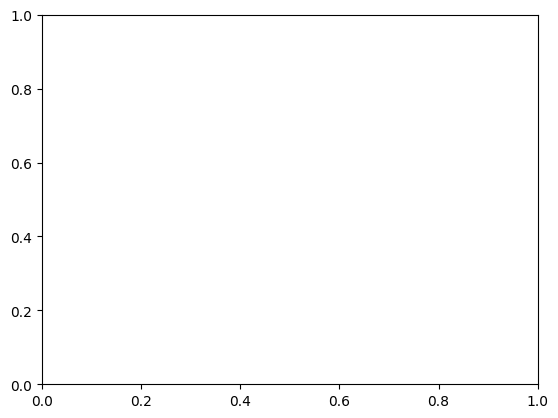

In [39]:
sns.lineplot(x='AGE_YEARS', y= 'AMT_CREDIT', data = app_data)
sns.lineplot(x='', y='', data= prev_data)

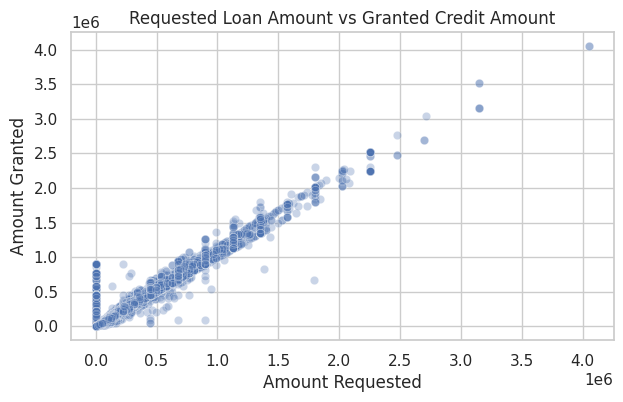

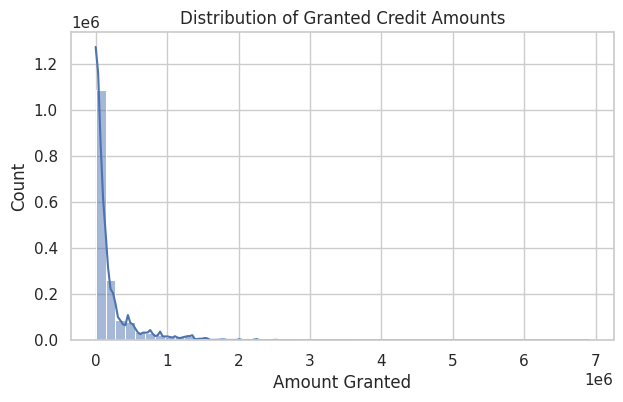

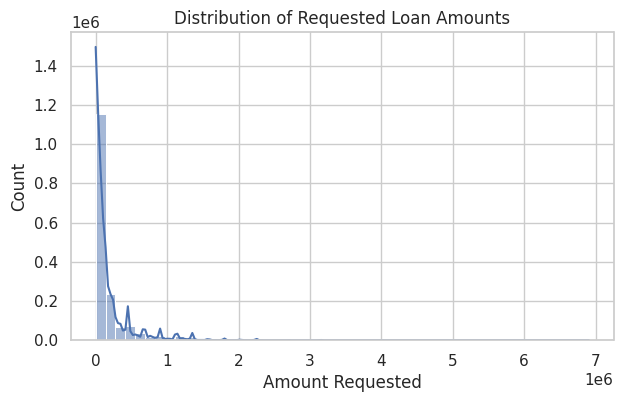

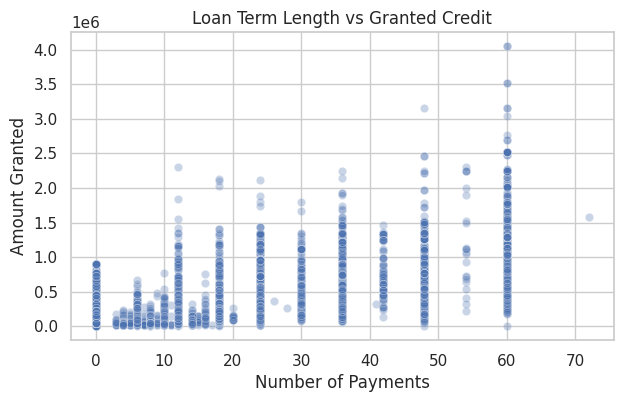

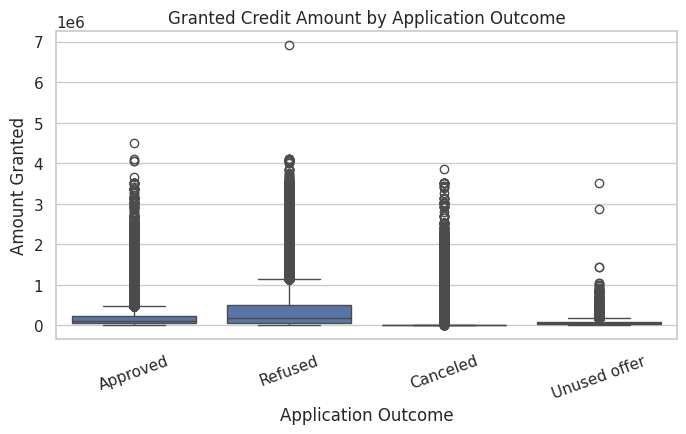

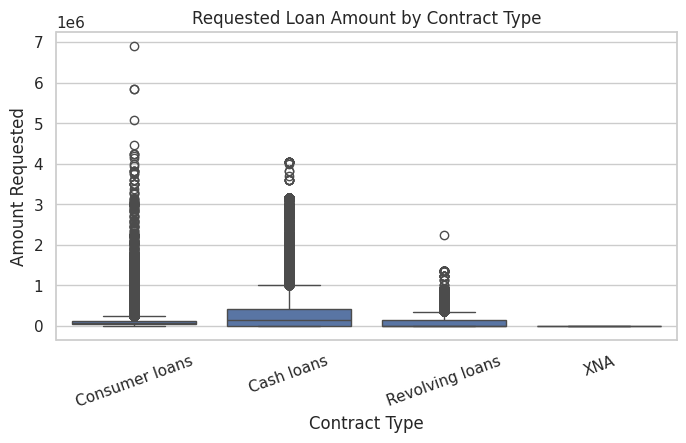

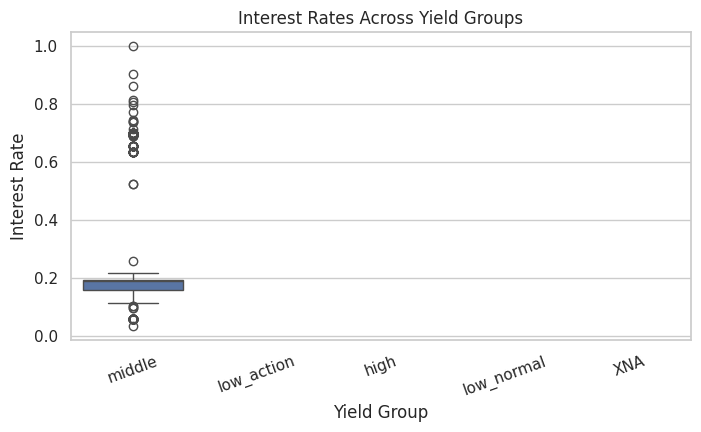

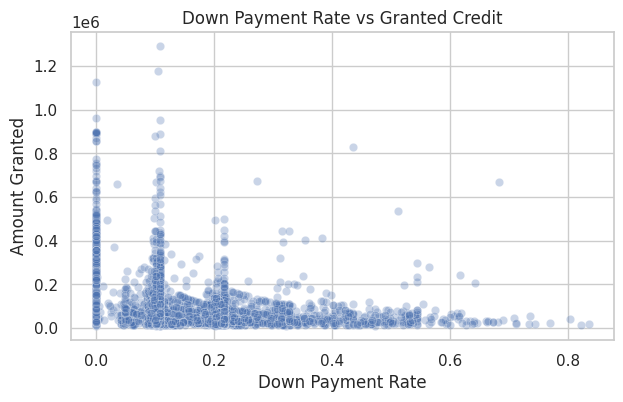

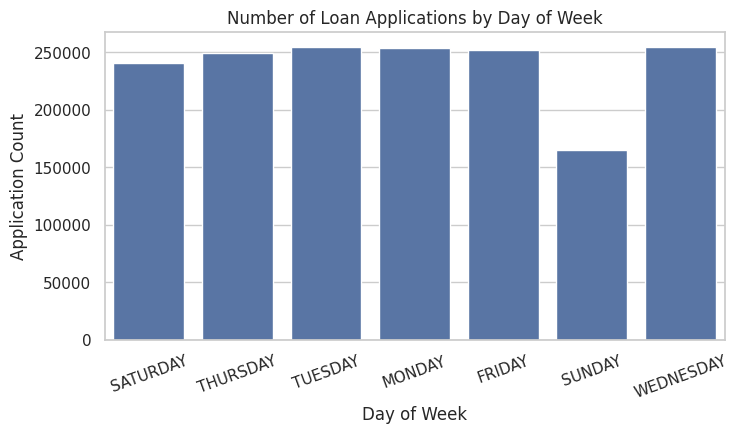

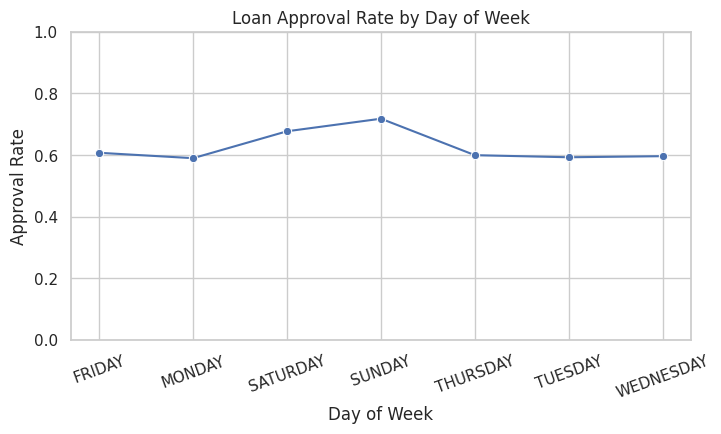

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# 1. How much credit is granted vs how much is requested
plt.figure(figsize=(7,4))
sns.scatterplot(
    data=prev_data.sample(min(len(prev_data), 20000), random_state=42),
    x="AMT_APPLICATION",
    y="AMT_CREDIT",
    alpha=0.3
)
plt.title("Requested Loan Amount vs Granted Credit Amount")
plt.xlabel("Amount Requested")
plt.ylabel("Amount Granted")
plt.show()


# 2. Distribution of granted credit amounts
plt.figure(figsize=(7,4))
sns.histplot(prev_data["AMT_CREDIT"], bins=50, kde=True)
plt.title("Distribution of Granted Credit Amounts")
plt.xlabel("Amount Granted")
plt.show()


# 3. Distribution of requested loan amounts
plt.figure(figsize=(7,4))
sns.histplot(prev_data["AMT_APPLICATION"], bins=50, kde=True)
plt.title("Distribution of Requested Loan Amounts")
plt.xlabel("Amount Requested")
plt.show()


# 4. Loan term length vs granted credit
plt.figure(figsize=(7,4))
sns.scatterplot(
    data=prev_data.sample(min(len(prev_data), 20000), random_state=42),
    x="CNT_PAYMENT",
    y="AMT_CREDIT",
    alpha=0.3
)
plt.title("Loan Term Length vs Granted Credit")
plt.xlabel("Number of Payments")
plt.ylabel("Amount Granted")
plt.show()


# 5. Granted credit by application outcome
plt.figure(figsize=(8,4))
sns.boxplot(data=prev_data, x="NAME_CONTRACT_STATUS", y="AMT_CREDIT")
plt.title("Granted Credit Amount by Application Outcome")
plt.xlabel("Application Outcome")
plt.ylabel("Amount Granted")
plt.xticks(rotation=20)
plt.show()


# 6. Requested amount by contract type
plt.figure(figsize=(8,4))
sns.boxplot(data=prev_data, x="NAME_CONTRACT_TYPE", y="AMT_APPLICATION")
plt.title("Requested Loan Amount by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Amount Requested")
plt.xticks(rotation=20)
plt.show()


# 7. Interest rates across pricing tiers
plt.figure(figsize=(8,4))
sns.boxplot(data=prev_data, x="NAME_YIELD_GROUP", y="RATE_INTEREST_PRIMARY")
plt.title("Interest Rates Across Yield Groups")
plt.xlabel("Yield Group")
plt.ylabel("Interest Rate")
plt.xticks(rotation=20)
plt.show()


# 8. Down payment rate vs granted credit
plt.figure(figsize=(7,4))
sns.scatterplot(
    data=prev_data.sample(min(len(prev_data), 20000), random_state=42),
    x="RATE_DOWN_PAYMENT",
    y="AMT_CREDIT",
    alpha=0.3
)
plt.title("Down Payment Rate vs Granted Credit")
plt.xlabel("Down Payment Rate")
plt.ylabel("Amount Granted")
plt.show()


# 9. Number of applications by day of the week
plt.figure(figsize=(8,4))
sns.countplot(data=prev_data, x="WEEKDAY_APPR_PROCESS_START")
plt.title("Number of Loan Applications by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Application Count")
plt.xticks(rotation=20)
plt.show()


# 10. Approval rate by day of the week
prev_data["APPROVED"] = (prev_data["NAME_CONTRACT_STATUS"] == "Approved").astype(int)

approval_rate = (
    prev_data
    .groupby("WEEKDAY_APPR_PROCESS_START")["APPROVED"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,4))
sns.lineplot(data=approval_rate, x="WEEKDAY_APPR_PROCESS_START", y="APPROVED", marker="o")
plt.title("Loan Approval Rate by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Approval Rate")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.show()